# Nutzungsanalyse

In diesem Notebook analysieren wir verschiedene Nutzungstypen und entwickeln benchmarks.
Nachfolgend eine kurze Beschreibung der Hauptnutzungen.


In [25]:
import textwrap
import src.package.importer as im
import src.package.importer_usages as im_usages

df = im.get_dataset('../package/dataset.csv')
df, short_df = im_usages.extract_usage_details(df, True)
df = im_usages.extract_garage_details(df, False)

# short_df.describe()
short_df[im_usages.NOM_PRIMARY_USAGE].value_counts()

WOHNBAUTEN__MFH_MEDIUM                                                                144
SCHULBAUTEN__VOLKSSCHULEN                                                              88
FREIZEITBAUTEN_SPORTBAUTEN_ERHOLUNGSBAUTEN__TURNHALLEN_SPORTHALLEN_MEHRZWECKHALLEN     51
SCHULBAUTEN__KINDERGAERTEN_HORTE                                                       37
WOHNBAUTEN__MFH_LOW                                                                    32
                                                                                     ... 
VERKEHRSBAUTEN__WERKHOEFE__DIENSTRAUM                                                   1
LANDWIRTSCHAFT__TIERSPITAELER                                                           1
JUSTIZ__WIEDEREINGLIEDERUNGSSTAETTEN                                                    1
LADENBAUTEN_HANDELSBAUTEN__MARKTHALLEN                                                  1
TECHNISCHE_ANLAGEN__ABFALLBESEITIGUNG__ENTSORGUNGSANLAGE                                1
Name: nom_

## Vorkommen Nutzungstypen
Vorkommen primärer, sekundärer, tertiärer und quaternärer Nutzungstypen.

#### Primärer Nutzungstyp

In [26]:
from sklearn.pipeline import Pipeline
from src.package.transformers import CombineFeatures

transform_pipeline = Pipeline([
        ('combine_features', CombineFeatures()),
    ])

df = transform_pipeline.fit_transform(df)
short_df = im_usages.__describe_usages(df)
short_df[im_usages.NOM_PRIMARY_USAGE].value_counts(normalize=True)

WOHNBAUTEN__MFH_MEDIUM                                                                0.156352
SCHULBAUTEN__VOLKSSCHULEN                                                             0.095548
FREIZEITBAUTEN_SPORTBAUTEN_ERHOLUNGSBAUTEN__TURNHALLEN_SPORTHALLEN_MEHRZWECKHALLEN    0.055375
SCHULBAUTEN__KINDERGAERTEN_HORTE                                                      0.040174
WOHNBAUTEN__MFH_LOW                                                                   0.034745
                                                                                        ...   
VERKEHRSBAUTEN__WERKHOEFE__DIENSTRAUM                                                 0.001086
LANDWIRTSCHAFT__TIERSPITAELER                                                         0.001086
JUSTIZ__WIEDEREINGLIEDERUNGSSTAETTEN                                                  0.001086
LADENBAUTEN_HANDELSBAUTEN__MARKTHALLEN                                                0.001086
TECHNISCHE_ANLAGEN__ABFALLBESEITIGUNG__ENTSORGUNGS

#### Sekundärer Nutzungstyp

In [27]:
short_df[im_usages.NOM_SECONDARY_USAGE].value_counts(normalize=True)

VERKEHRSBAUTEN__TIEFGARAGEN_EINSTELLHALLEN                                            0.354430
FREIZEITBAUTEN_SPORTBAUTEN_ERHOLUNGSBAUTEN__TURNHALLEN_SPORTHALLEN_MEHRZWECKHALLEN    0.078059
VERKEHRSBAUTEN__GARAGEN_FREISTEHEND                                                   0.054852
LADENBAUTEN_HANDELSBAUTEN__EINZELHANDEL                                               0.050633
BUEROBAUTEN__VOLLAUSBAU                                                               0.046414
SCHULBAUTEN__KINDERGAERTEN_HORTE                                                      0.042194
WOHNBAUTEN__MFH_MEDIUM                                                                0.040084
BUEROBAUTEN__EDELROHBAU                                                               0.033755
SCHULBAUTEN__VOLKSSCHULEN                                                             0.029536
GASTGEWERBE_FREMDENVERKEHRSBAUTEN__RESTAURANT                                         0.027426
KULTUR__SAAL                                      

#### Tertiärer Nutzungstyp

In [28]:
short_df[im_usages.NOM_TERTIARY_USAGE].value_counts(normalize=True)

VERKEHRSBAUTEN__TIEFGARAGEN_EINSTELLHALLEN                                                  0.326316
BUEROBAUTEN__VOLLAUSBAU                                                                     0.068421
LADENBAUTEN_HANDELSBAUTEN__EINZELHANDEL                                                     0.068421
BUEROBAUTEN__EDELROHBAU                                                                     0.052632
WOHNBAUTEN__MFH_MEDIUM                                                                      0.052632
FREIZEITBAUTEN_SPORTBAUTEN_ERHOLUNGSBAUTEN__TURNHALLEN_SPORTHALLEN_MEHRZWECKHALLEN          0.047368
GASTGEWERBE_FREMDENVERKEHRSBAUTEN__KANTINEN                                                 0.026316
SCHULBAUTEN__KINDERGAERTEN_HORTE                                                            0.021053
WOHNBAUTEN__MFH_LOW                                                                         0.021053
SCHUTZBAUTEN__ZIVILSCHUTZANLAGEN                                                           

#### Quaternärer Nutzungstyp

In [29]:
short_df[im_usages.NOM_QUATERNARY_USAGE].value_counts(normalize=True)

VERKEHRSBAUTEN__TIEFGARAGEN_EINSTELLHALLEN                                            0.338983
LADENBAUTEN_HANDELSBAUTEN__EINZELHANDEL                                               0.118644
BUEROBAUTEN__VOLLAUSBAU                                                               0.084746
SCHULBAUTEN__KINDERGAERTEN_HORTE                                                      0.084746
KULTUR__SAAL                                                                          0.084746
BUEROBAUTEN__EDELROHBAU                                                               0.033898
VERKEHRSBAUTEN__BAHNHOEFE                                                             0.016949
SCHULBAUTEN__HEILPAEDAGOGISCHE_SONDERSCHULEN                                          0.016949
VERWALTUNGSBAUTEN                                                                     0.016949
FREIZEITBAUTEN_SPORTBAUTEN__HALLENBAEDER                                              0.016949
LAGERBAUTEN_MEHRSTOECKIGE                         

## Benchmarks
Nachfolgend einige einfache Benchmarks zu den Nuzungstypen.

#### Garage vorhanden pro Nutzugstyp

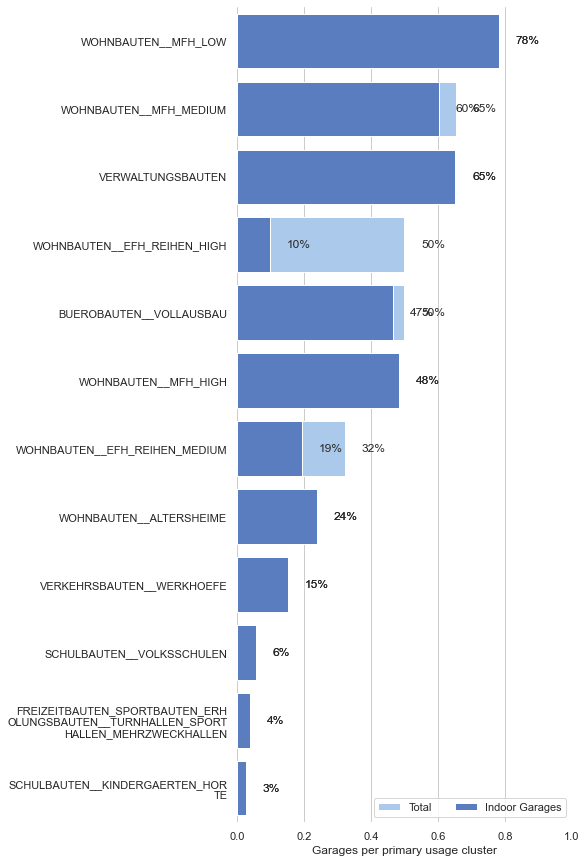

In [30]:
import src.analysis.usages_feature_engineering as fr_eng

garages = fr_eng.garage_count_per_usage(df)
garages = fr_eng.drop_lessthan(garages, 20)
garages = garages[[im_usages.NOM_PRIMARY_USAGE, 'garages_total', 'indoor_garages_total']]
garages = garages.drop_duplicates(im_usages.NOM_PRIMARY_USAGE)
garages = garages.nlargest(20,'garages_total')

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total garages
sns.set_color_codes("pastel")
sns.barplot(x="garages_total", y=im_usages.NOM_PRIMARY_USAGE, data=garages,
            label="Total", color="b")

# Plot the garages (total and indoor)
sns.set_color_codes("muted")
sns.barplot(x="indoor_garages_total", y=im_usages.NOM_PRIMARY_USAGE, data=garages,
            label="Indoor Garages", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",
       xlabel="Garages per primary usage cluster")
sns.despine(left=True, bottom=True)
ax.set_yticklabels([textwrap.fill(e, 30) for e in garages[im_usages.NOM_PRIMARY_USAGE]])

# add axis value labels, formatted as percentage
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.05,
            p.get_y() + p.get_height() / 2,
            '{:.0%}'.format(width),
            ha = 'left',
            va = 'center')

#### Garage Durchschnitt pro Nutzungstyp